In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

train_df['seperated_ingredients'] = train_df['ingredients'].apply(','.join)
test_df['seperated_ingredients'] = test_df['ingredients'].apply(','.join)

In [3]:
#Ingredients in a Dish
print('Maximum Number of Ingredients in a Dish: ',train_df['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',train_df['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


Text(0.5,1,'Ingredients in a Dish Distribution')

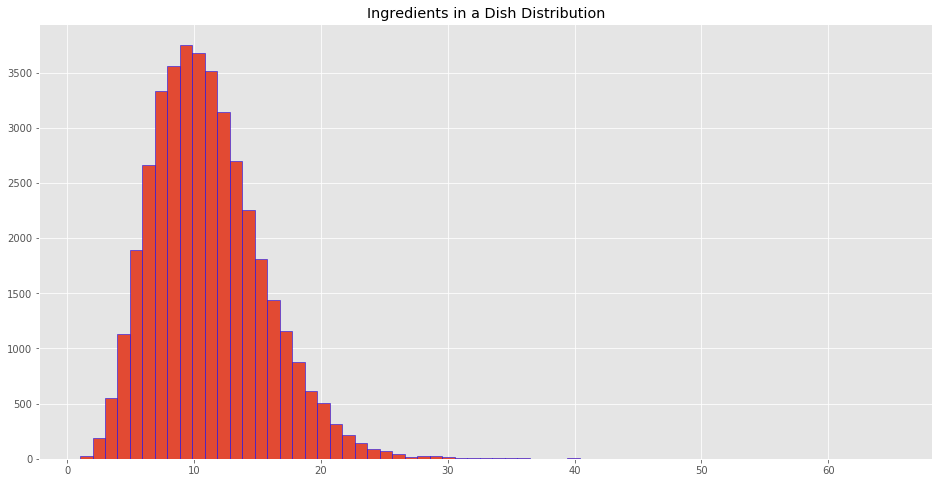

In [4]:
#The dish with just a single ingredient might be a simple boiled dish :D.
plt.hist(train_df['ingredients'].str.len(),bins=max(train_df['ingredients'].str.len()),edgecolor='b')
plt.gcf().set_size_inches(16,8)
plt.title('Ingredients in a Dish Distribution')

Text(0.5,1,'Cuisine Distribution')

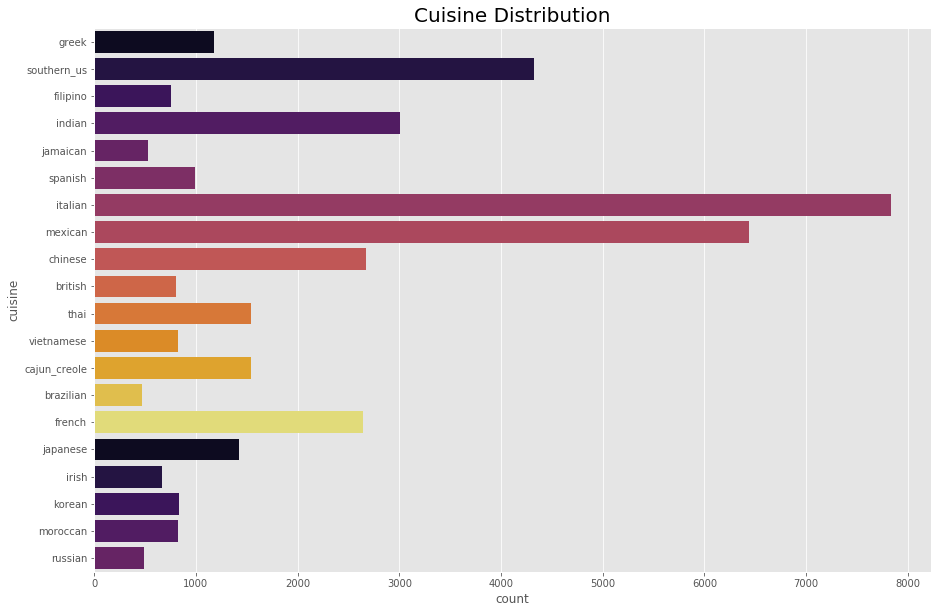

In [5]:
#Top Cuisines
sns.countplot(y='cuisine', data=train_df,palette=sns.color_palette('inferno',15))
plt.gcf().set_size_inches(15,10)
plt.title('Cuisine Distribution',size=20)

Text(0.5,1,'Top 15 Ingredients')

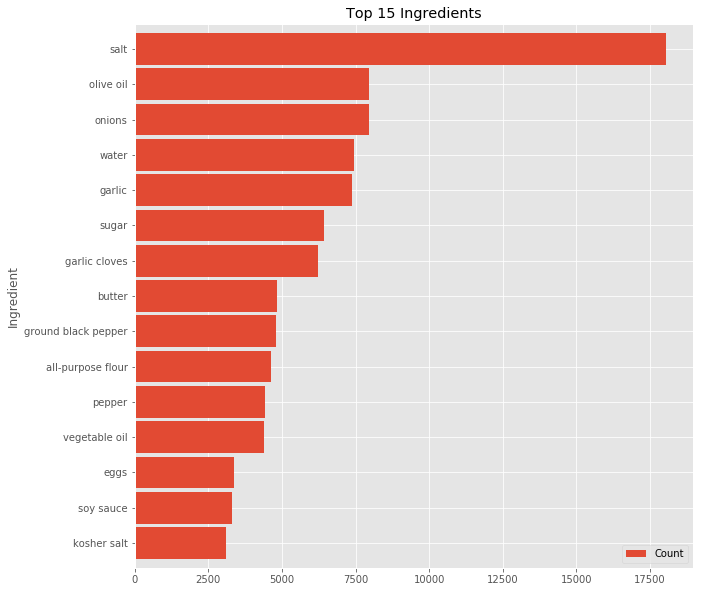

In [6]:
#Main Ingredients
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
counts = vec.fit_transform(train_df['seperated_ingredients']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['Ingredient','Count'])
count.set_index('Ingredient').sort_values('Count',ascending=False)[:15].plot.barh(width=0.9)
plt.gcf().set_size_inches(10,10)
plt.gca().invert_yaxis()
plt.title('Top 15 Ingredients')

In [7]:
#Finding similar dishes
ingreList = []
for index, row in train_df.iterrows():
    ingre = row['ingredients']
    
    for i in ingre:
        if i not in ingreList:
            ingreList.append(i)
def binary(ingre_list):
    binaryList = []
    
    for item in ingreList:
        if item in ingre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList
train_df['bin ingredients']=train_df['ingredients'].apply(lambda x: binary(x))

In [8]:
from scipy import spatial

def Similarity(Id1, Id2):
    a = train_df.iloc[Id1]
    b = train_df.iloc[Id2]
    
    A = a['bin ingredients']
    B = b['bin ingredients']
    distance=spatial.distance.cosine(A,B)
    
    return distance, Id2

In [9]:
#Dishes similar t Dish No 1
food=[]
for i in train_df.index:
    food.append(Similarity(1,i))
common_ingredients=sorted(food,key=lambda x: x[0])[1:10]
indexes=[]
for i in range(len(common_ingredients)):
    indexes.append(common_ingredients[i][1])
train_df.iloc[indexes]

,cuisine,id,ingredients,seperated_ingredients,bin ingredients
26308,british,42852,"[eggs, vegetable oil, onions, ground black pep...","eggs,vegetable oil,onions,ground black pepper,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ..."
5909,southern_us,46403,"[ground black pepper, cucumber, eggs, salt, mi...","ground black pepper,cucumber,eggs,salt,milk,al...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
26464,southern_us,42450,"[flour, milk, salt, eggs, vegetable oil, yello...","flour,milk,salt,eggs,vegetable oil,yellow corn...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
6215,southern_us,1915,"[ground black pepper, yellow corn meal, salt, ...","ground black pepper,yellow corn meal,salt,oliv...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
15862,southern_us,30967,"[green tomatoes, yellow corn meal, salt, veget...","green tomatoes,yellow corn meal,salt,vegetable...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
22917,british,47160,"[milk, eggs, plain flour, salt, pepper]","milk,eggs,plain flour,salt,pepper","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
29322,british,21644,"[plain flour, sausages, milk, salt, eggs]","plain flour,sausages,milk,salt,eggs","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
31153,british,20621,"[beef drippings, plain flour, salt, eggs, milk]","beef drippings,plain flour,salt,eggs,milk","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
36409,filipino,18421,"[vegetable oil, eggs, asian eggplants, salt, g...","vegetable oil,eggs,asian eggplants,salt,ground...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."


In [10]:
#Top Bigrams by Cuisines
import nltk
from collections import Counter

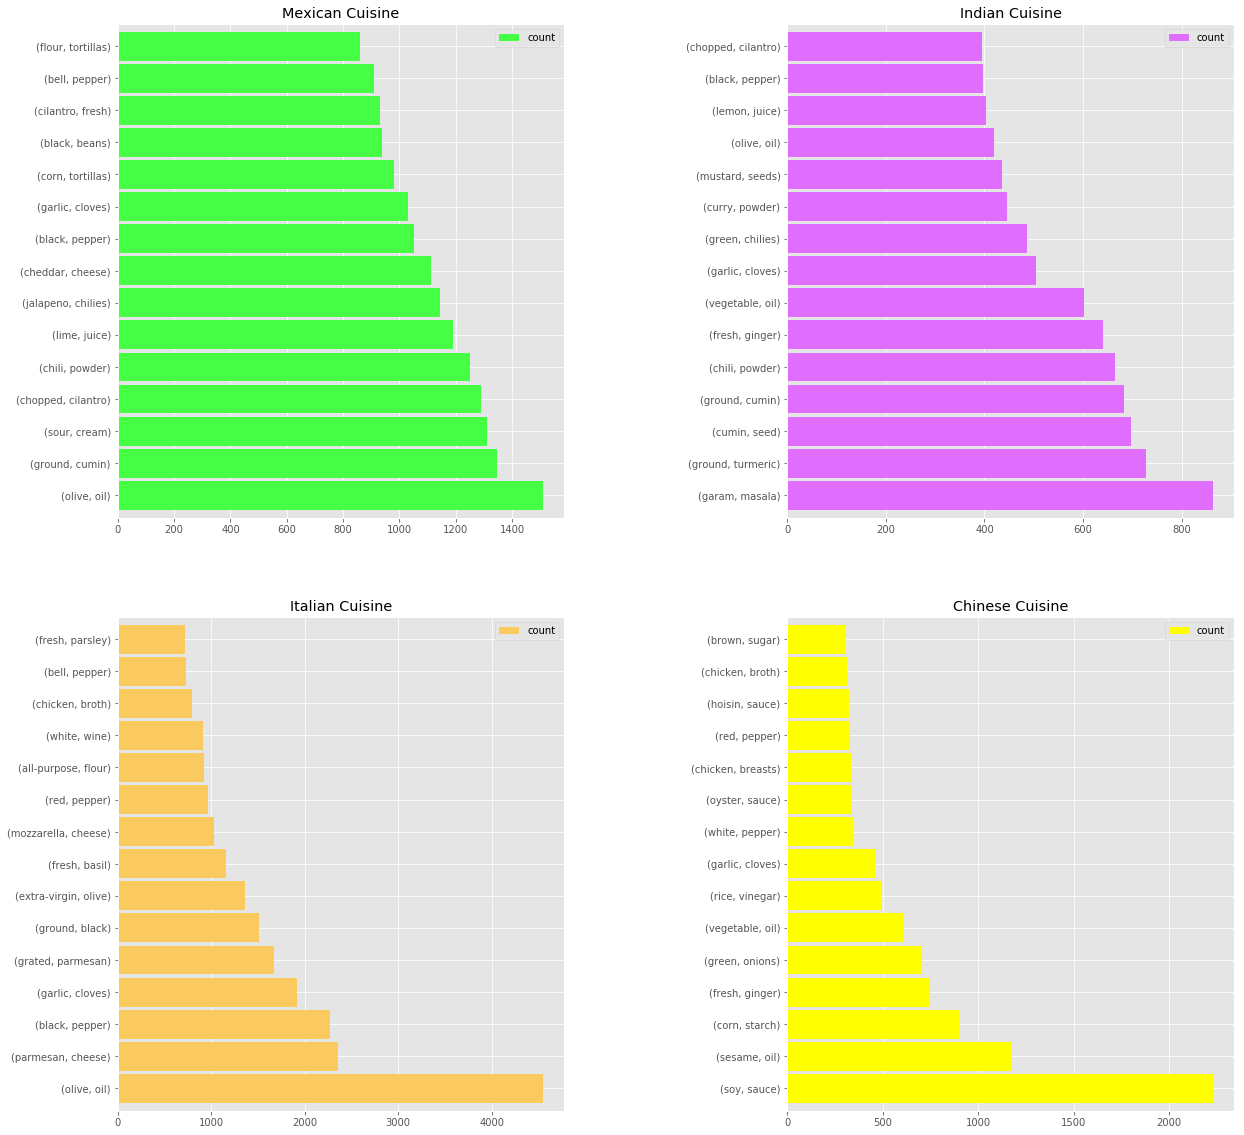

In [11]:
train_df['for ngrams']=train_df['seperated_ingredients'].str.replace(',',' ')
f,ax=plt.subplots(2,2,figsize=(20,20))
def ingre_cusine(cuisine):
    frame=train_df[train_df['cuisine']==cuisine]
    common=list(nltk.bigrams(nltk.word_tokenize(" ".join(frame['for ngrams']))))
    return pd.DataFrame(Counter(common),index=['count']).T.sort_values('count',ascending=False)[:15]
ingre_cusine('mexican').plot.barh(ax=ax[0,0],width=0.9,color='#45ff45')
ax[0,0].set_title('Mexican Cuisine')
ingre_cusine('indian').plot.barh(ax=ax[0,1],width=0.9,color='#df6dfd')
ax[0,1].set_title('Indian Cuisine')
ingre_cusine('italian').plot.barh(ax=ax[1,0],width=0.9,color='#fbca5f')
ax[1,0].set_title('Italian Cuisine')
ingre_cusine('chinese').plot.barh(ax=ax[1,1],width=0.9,color='#ffff00')
ax[1,1].set_title('Chinese Cuisine')
plt.subplots_adjust(wspace=0.5)

In [12]:
#Modeling
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(binary=True).fit(train_df['seperated_ingredients'].values)
X_train_vectorized = vect.transform(train_df['seperated_ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')
Result_transformed = vect.transform(test_df['seperated_ingredients'].values)
Result_transformed = Result_transformed.astype('float')

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_transformed = encoder.fit_transform(train_df.cuisine)


In [14]:
#Logistic Regression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = 0)

from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=10,dual=False)
clf1.fit(X_train , y_train)
clf1.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.79424778761061943

In [15]:
#Ensemble Model
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(C=10,dual=False)),('clf2',SVC(C=100,gamma=1,kernel='rbf',probability=True))],voting='soft',weights=[1,2])
vclf.fit(X_train , y_train)
vclf.score(X_test, y_test)

0.81516492357200321

In [16]:
y_predicted = vclf.predict(Result_transformed)
y_predicted_final = encoder.inverse_transform(y_predicted)
predictions = pd.DataFrame({'cuisine' : y_predicted_final , 'id' : test_df.id })
predictions = predictions[[ 'id' , 'cuisine']]
predictions.to_csv('submit.csv', index = False)

Text(16,0.5,'True label')

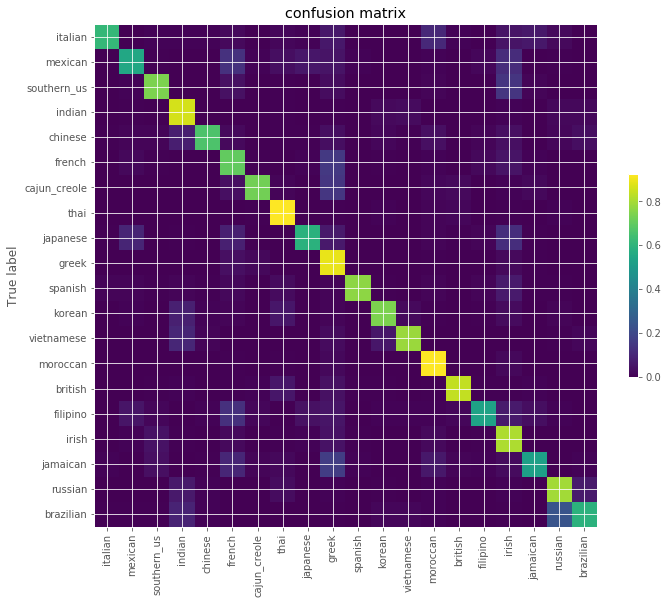

In [19]:
#Inspecting the classification results using a confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, vclf.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = train_df['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')

In [21]:
from sklearn.metrics import classification_report
y_pred = vclf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.83      0.62      0.71       120
     mexican       0.63      0.56      0.59       198
 southern_us       0.77      0.74      0.76       362
      indian       0.84      0.87      0.85       696
     chinese       0.83      0.67      0.74       181
      french       0.67      0.70      0.68       658
cajun_creole       0.79      0.73      0.76       302
        thai       0.89      0.92      0.91       783
    japanese       0.71      0.59      0.64       159
       greek       0.83      0.90      0.86      1932
     spanish       0.87      0.77      0.82       147
      korean       0.83      0.74      0.78       348
  vietnamese       0.80      0.79      0.80       183
    moroccan       0.93      0.93      0.93      1631
     british       0.81      0.84      0.82       199
    filipino       0.61      0.53      0.57       118
       irish       0.76      0.81      0.79      1076
    jamaican       0.73    